## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.

Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets/StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Matplotlib is building the font cache; this may take a moment.


<Axes: >

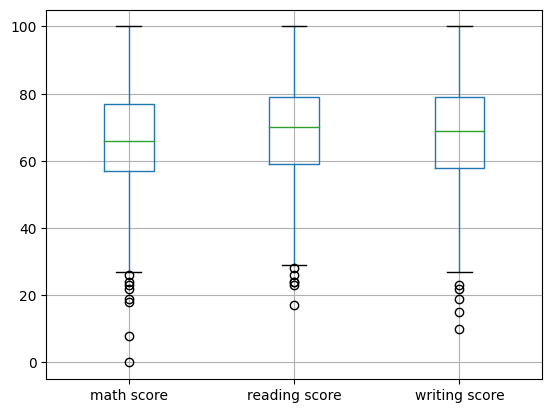

In [8]:
columns = ["math score", "reading score", "writing score"]

df.boxplot(columns)

In [10]:
np.where(df['math score'] < 30)

(array([ 17,  59,  91, 145, 327, 338, 363, 466, 528, 601, 683, 787, 842,
        980], dtype=int64),)

In [12]:
# 1. Z-score method
# 2. IQR method
# 3. Clustering-based methods
# 4. Machine Learning-based methods

In [101]:
# using z-score method

z_scores = np.abs((df['math score'] - df['math score'].mean()) / df['math score'].std())

In [102]:
z_scores

0      0.389828
1      0.191979
2      1.576922
3      1.258913
4      0.653627
         ...   
995    1.445023
996    0.269668
997    0.467517
998    0.126030
999    0.719577
Name: math score, Length: 1000, dtype: float64

In [103]:
thresold = 2.6

outliers = df[z_scores > thresold]

In [104]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [105]:
# data frame without outliers

df_no_outliers = df[z_scores <= thresold]

In [106]:
df_no_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [107]:
import matplotlib.pyplot as plt

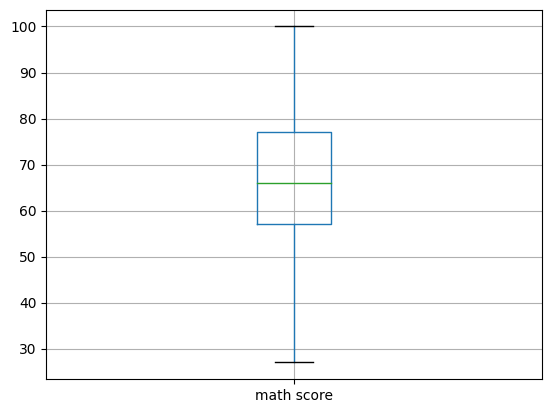

In [108]:
columns = ["math score"]
df_no_outliers.boxplot(columns)
plt.show()

In [109]:
# remove outliers from reading score and wriitng score

In [110]:
z_scores = np.abs((df_no_outliers['reading score'] - df_no_outliers['reading score'].mean()) / df_no_outliers['reading score'].std())

In [111]:
outliers = df_no_outliers[z_scores > thresold]

In [112]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
810,male,group A,some high school,standard,none,51,31,36
896,male,group B,high school,free/reduced,none,36,29,27


In [113]:
df_no_outliers = df_no_outliers[z_scores <= thresold]

In [114]:
df_no_outliers.boxplot(column=['reading score'])

<Axes: >

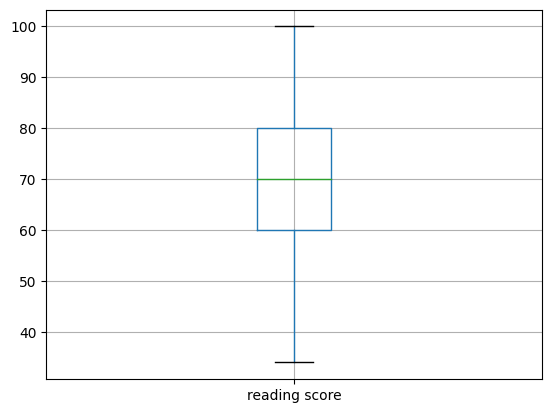

In [115]:
plt.show()

In [116]:
z_scores = np.abs((df_no_outliers['writing score'] - df_no_outliers['writing score'].mean()) / df_no_outliers['writing score'].std())

In [117]:
z_scores

0      0.369442
1      1.341879
2      1.689178
3      1.714353
4      0.438901
         ...   
995    1.828098
996    0.950295
997    0.255697
998    0.577821
999    1.202960
Name: writing score, Length: 985, dtype: float64

In [118]:
outliers = df_no_outliers[z_scores > thresold]

In [119]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [120]:
df_no_outliers = df_no_outliers[z_scores <= thresold]

In [121]:
df_no_outliers.boxplot(column=['writing score'])

<Axes: >

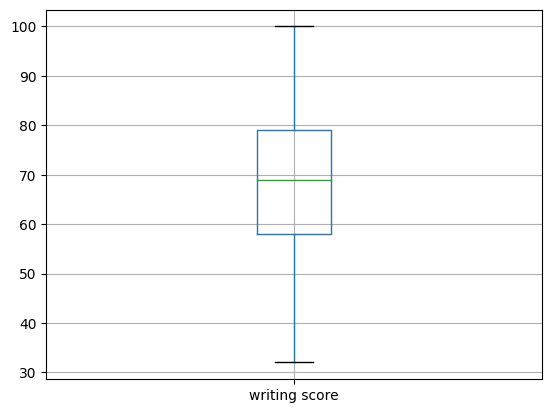

In [122]:
plt.show()

In [123]:
df_no_outliers.boxplot(column=['math score', 'reading score', 'writing score'])

<Axes: >

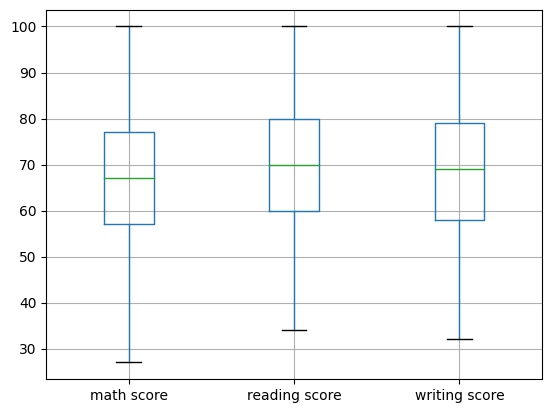

In [124]:
plt.show()

# Data transformation and normalization

In [125]:
# data transformation applied to reading score

In [126]:
df_transformed = df_no_outliers.copy()

In [128]:
# applying logarithmic transformation to "reading score" column values

df_transformed['reading score'] = np.log(df_transformed['reading score'])

In [129]:
df_transformed

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,4.276666,74
1,female,group C,some college,standard,completed,69,4.499810,88
2,female,group B,master's degree,standard,none,90,4.553877,93
3,male,group A,associate's degree,free/reduced,none,47,4.043051,44
4,male,group C,some college,standard,none,76,4.356709,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,4.595120,95
996,male,group C,high school,free/reduced,none,62,4.007333,55
997,female,group C,high school,free/reduced,completed,59,4.262680,65
998,female,group D,some college,standard,completed,68,4.356709,77


In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
# normalizing "math score" by min-max-scaler method

In [134]:
scaler = MinMaxScaler() # or StandardScaler() for standardization

df_normalized = df_no_outliers.copy()

In [137]:
df_normalized

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.616438,72,74
1,female,group C,some college,standard,completed,0.575342,90,88
2,female,group B,master's degree,standard,none,0.863014,95,93
3,male,group A,associate's degree,free/reduced,none,0.273973,57,44
4,male,group C,some college,standard,none,0.671233,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,99,95
996,male,group C,high school,free/reduced,none,0.479452,55,55
997,female,group C,high school,free/reduced,completed,0.438356,71,65
998,female,group D,some college,standard,completed,0.561644,78,77


In [138]:
df_normalized['math score'] = scaler.fit_transform(df_normalized[['math score']])

In [139]:
df_normalized

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.616438,72,74
1,female,group C,some college,standard,completed,0.575342,90,88
2,female,group B,master's degree,standard,none,0.863014,95,93
3,male,group A,associate's degree,free/reduced,none,0.273973,57,44
4,male,group C,some college,standard,none,0.671233,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,99,95
996,male,group C,high school,free/reduced,none,0.479452,55,55
997,female,group C,high school,free/reduced,completed,0.438356,71,65
998,female,group D,some college,standard,completed,0.561644,78,77
